In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
base = pd.read_csv('/content/SalesData.csv')
base.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


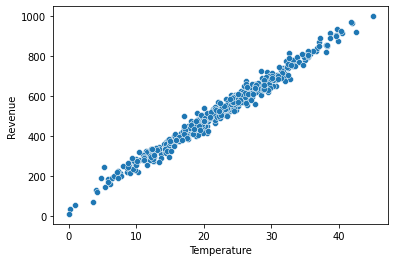

In [7]:
sns.scatterplot(base['Temperature'], base['Revenue']);

In [8]:
x_train = base['Temperature']
y_train = base['Revenue']

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [18]:
epoch_hist = model.fit(x_train, y_train, epochs = 1500)

Epoch 1/1500
16/16 [==============================] - 0s 2ms/step - loss: 638.9036
Epoch 2/1500
16/16 [==============================] - 0s 2ms/step - loss: 631.7440
Epoch 3/1500
16/16 [==============================] - 0s 2ms/step - loss: 627.1151
Epoch 4/1500
16/16 [==============================] - 0s 2ms/step - loss: 626.4316
Epoch 5/1500
16/16 [==============================] - 0s 3ms/step - loss: 629.8520
Epoch 6/1500
16/16 [==============================] - 0s 2ms/step - loss: 623.7515
Epoch 7/1500
16/16 [==============================] - 0s 2ms/step - loss: 632.5648
Epoch 8/1500
16/16 [==============================] - 0s 1ms/step - loss: 632.2203
Epoch 9/1500
16/16 [==============================] - 0s 2ms/step - loss: 626.8293
Epoch 10/1500
16/16 [==============================] - 0s 2ms/step - loss: 627.2656
Epoch 11/1500
16/16 [==============================] - 0s 2ms/step - loss: 631.8517
Epoch 12/1500
16/16 [==============================] - 0s 2ms/step - loss: 631.5862
E

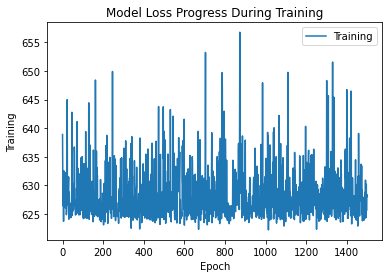

In [19]:
plt.plot(epoch_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training')
plt.legend(['Training'])

In [21]:
#previsao com o modelo treinado
temp = 10
revenue = model.predict([temp])
print(revenue)

[[259.41687]]


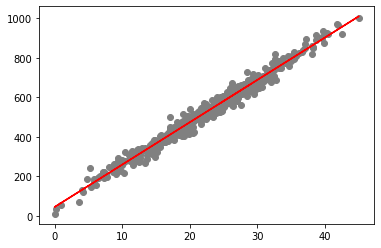

In [22]:
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_train, model.predict(x_train), color = 'red')